In [1]:
import torch
from torch import nn
import numpy as np
import torchvision
import torchvision.transforms as transforms

np.random.seed(111)

In [2]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform)

In [5]:

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

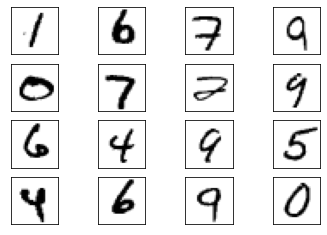

In [6]:
import matplotlib.pyplot as plt
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output
discriminator = Discriminator().to(device=device)

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [9]:
lr = 0.0001
num_epochs = 200
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [10]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for discriminator training
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device)
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Discriminator training
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for generator training
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device)

        # Generator training
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Output value of loss function
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5473917722702026
Epoch: 0 Loss G.: 0.5109264850616455
Epoch: 1 Loss D.: 0.006141213700175285
Epoch: 1 Loss G.: 6.061453819274902
Epoch: 2 Loss D.: 0.0027422443963587284
Epoch: 2 Loss G.: 7.213212966918945
Epoch: 3 Loss D.: 0.027730774134397507
Epoch: 3 Loss G.: 8.608726501464844
Epoch: 4 Loss D.: 0.032262321561574936
Epoch: 4 Loss G.: 3.8686745166778564
Epoch: 5 Loss D.: 0.1089228093624115
Epoch: 5 Loss G.: 3.409924030303955
Epoch: 6 Loss D.: 0.21616588532924652
Epoch: 6 Loss G.: 3.404698133468628
Epoch: 7 Loss D.: 0.17725422978401184
Epoch: 7 Loss G.: 2.8117611408233643
Epoch: 8 Loss D.: 0.20257754623889923
Epoch: 8 Loss G.: 3.343622922897339
Epoch: 9 Loss D.: 0.265974760055542
Epoch: 9 Loss G.: 2.2161121368408203
Epoch: 10 Loss D.: 0.2587563395500183
Epoch: 10 Loss G.: 2.3126423358917236
Epoch: 11 Loss D.: 0.2583896815776825
Epoch: 11 Loss G.: 2.3425850868225098
Epoch: 12 Loss D.: 0.4863554537296295
Epoch: 12 Loss G.: 1.598469853401184
Epoch: 13 Loss D.: 0.3056921

Epoch: 109 Loss D.: 0.6082865595817566
Epoch: 109 Loss G.: 1.3018749952316284
Epoch: 110 Loss D.: 0.5273563861846924
Epoch: 110 Loss G.: 1.1475427150726318
Epoch: 111 Loss D.: 0.5517126321792603
Epoch: 111 Loss G.: 1.216860294342041
Epoch: 112 Loss D.: 0.4938010275363922
Epoch: 112 Loss G.: 1.0735788345336914
Epoch: 113 Loss D.: 0.4554426372051239
Epoch: 113 Loss G.: 1.1288535594940186
Epoch: 114 Loss D.: 0.5639996528625488
Epoch: 114 Loss G.: 1.1546483039855957
Epoch: 115 Loss D.: 0.6553759574890137
Epoch: 115 Loss G.: 1.1441364288330078
Epoch: 116 Loss D.: 0.4907597303390503
Epoch: 116 Loss G.: 1.1256165504455566
Epoch: 117 Loss D.: 0.4914745092391968
Epoch: 117 Loss G.: 1.1295009851455688
Epoch: 118 Loss D.: 0.5069392919540405
Epoch: 118 Loss G.: 1.2317824363708496
Epoch: 119 Loss D.: 0.5030918121337891
Epoch: 119 Loss G.: 1.2142062187194824
Epoch: 120 Loss D.: 0.44826287031173706
Epoch: 120 Loss G.: 1.296370029449463
Epoch: 121 Loss D.: 0.5467798709869385
Epoch: 121 Loss G.: 1.2219

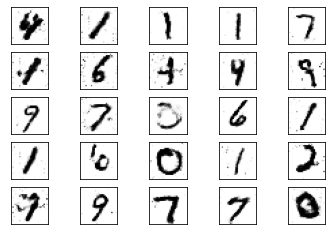

In [14]:

latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.cpu().detach()

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])